In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg  
  inflating: Final datateset for Image/validation/happy/16238.jpg  
  inflating: Final datateset for Image/validation/happy/16275.jpg  
  inflating: Final datateset for Image/validation/happy/1628.jpg 

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np

In [4]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [18]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [19]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [20]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [21]:
image_size = [224,224]

vgg= VGG16(input_shape=image_size+[3], weights = None, include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [22]:
for layer in vgg.layers:
  layer.trainable = False

In [23]:
x=Flatten()(vgg.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 221s 587ms/step - loss: 1.9110 - accuracy: 0.2672
Epoch 2/25
351/351 [==============================] - 203s 577ms/step - loss: 1.7447 - accuracy: 0.3342
Epoch 3/25
351/351 [==============================] - 205s 583ms/step - loss: 1.6952 - accuracy: 0.3574
Epoch 4/25
351/351 [==============================] - 204s 580ms/step - loss: 1.6701 - accuracy: 0.3713
Epoch 5/25
351/351 [==============================] - 211s 601ms/step - loss: 1.6362 - accuracy: 0.3811
Epoch 6/25
351/351 [==============================] - 204s 582ms/step - loss: 1.5929 - accuracy: 0.3993
Epoch 7/25
351/351 [==============================] - 203s 579ms/step - loss: 1.6260 - accuracy: 0.3853
Epoch 8/25
351/351 [==============================] - 205s 584ms/step - loss: 1.5823 - accuracy: 0.4021
Epoch 9/25
351/351 [==============================] - 204s 581ms/step - loss: 1.5715 - accuracy: 0.4034
Epoch 10/25
351/351 [==============================] - 202s 575m

Accuracy:  0.4627726376056671


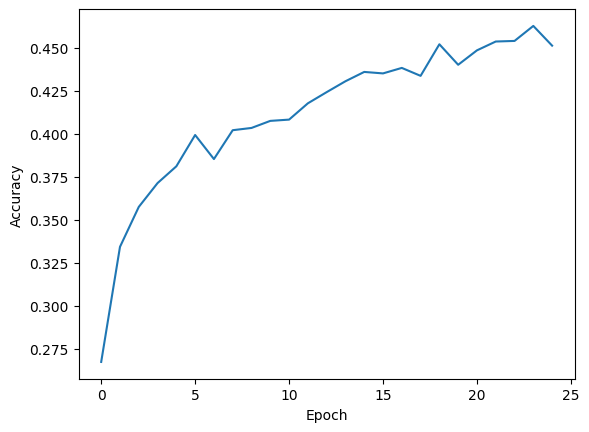

In [26]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [27]:
model.save('G:\\BAUST\\DIFFERENT SEMISTER PDF,CT.Q,ANSWER\\L-4, T-1\\LAB\\CSE 4132\\model\\Face_VGG16_Base_Line.h5')

In [28]:
# Tesing
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model('G:\\BAUST\\DIFFERENT SEMISTER PDF,CT.Q,ANSWER\\L-4, T-1\\LAB\\CSE 4132\\model\\Face_VGG16_Base_Line.h5')

In [29]:
# Define the classes
classes = ['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'netural', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']

In [34]:
# Load the image to be tested
image = Image.open('/content/Final datateset for Image/validation/fear/10267.jpg')

# Convert the image to RGB format
image = image.convert('RGB')

# Resize the image to the same size used for training the model
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

In [35]:
# Predict the class of the image using the pre-trained model
predictions = model.predict(image_array)

1/1 [==============================] - 0s 21ms/step


In [36]:
# Get the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the name of the predicted class
predicted_class = classes[predicted_class_index]

# Print the predicted class
print('The predicted class is:', predicted_class)

The predicted class is: happy
